## Goal: 
Our goal is to compress 60,000 single colors into 64 classes, using kmeans methods. Replace the original sample with 64 clusters of centroid without losing the original quality.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
#for dots in two arries, we are going to pair wise distance
from sklearn.datasets import load_sample_image
#load images (China / Flower)
from sklearn.utils import shuffle
#shuffle array, list, dataframe... 

## Load image

In [2]:
# Instantiate
flower = load_sample_image("flower.jpg")
flower # eg. 2,9,13 = length x width x pixels (color)

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [3]:
flower.dtype  # classic image type 

dtype('uint8')

In [4]:
 flower.shape #dimension:length x width x pixels (color)

(427, 640, 3)

In [5]:
# How many different color in image? drop duplicate
# Covert array to one row type:
newimage = flower.reshape((427 * 640, 3))
newimage.shape # total 273280 rows, 3 columns for each row - features

(273280, 3)

Image will show l,w,d in Python, we need to remove the duplicate and get how many colors we have for this image. 

In [6]:
# Drop duplicate
pd.DataFrame(newimage).drop_duplicates().shape # only 62941 unique colors left 

(62941, 3)

### 1. Determine the hyperparameters of the image preprocessing
Kmeans does not accept 3D arrays as feature matrices, so data preprocessing is required.

In [7]:
n_clusters = 64

flower = np.array(flower, dtype=np.float64) / flower.max()
# imshow performs well on floating point Numbers, so we convert the image data 
# to floating point numbers and compress it to range [0,1], pixel values from 0 to 255

# Convert image format to matrix format
w, h, d = original_shape = tuple(flower.shape) #length, width, pixel
assert d == 3, "one box has features not equal to 3"   
# assert is similar to raise error if not，means："raise Error if not True"

image_array = np.reshape(flower, (w*h, d)) #change structure 3D -> 2D
# reshape(object, new shape, order="c")

### 2.Vector quantization of data: modeling

In [8]:
# First, use 1000 samples to find the centroid
image_array_sample = shuffle(image_array, random_state = 0)[:1000]
# Shuffle 1000 samples from image_array and shuffle. 

kmeans = KMeans(n_clusters = n_clusters, random_state = 0).fit(image_array_sample)
kmeans.cluster_centers_ #(64, 3) array

array([[0.00205415, 0.24687208, 0.30812325],
       [0.76013072, 0.4869281 , 0.26535948],
       [0.02088836, 0.1290116 , 0.11396559],
       [0.91862745, 0.67509804, 0.4227451 ],
       [0.85098039, 0.28011204, 0.0140056 ],
       [0.54901961, 0.2627451 , 0.1254902 ],
       [0.0021999 , 0.27479675, 0.23873745],
       [0.00272805, 0.34407502, 0.32293265],
       [0.79264706, 0.15588235, 0.02352941],
       [0.00403361, 0.04985994, 0.02621849],
       [0.02156863, 0.18390805, 0.17836376],
       [0.21699346, 0.19869281, 0.10326797],
       [0.81254902, 0.58784314, 0.37098039],
       [0.90117647, 0.79529412, 0.59607843],
       [0.53490196, 0.37411765, 0.21098039],
       [0.90659537, 0.57361854, 0.30481283],
       [0.6127451 , 0.03529412, 0.00686275],
       [0.02577031, 0.17572362, 0.07226891],
       [0.30457516, 0.28366013, 0.10196078],
       [0.90980392, 0.40098039, 0.09509804],
       [0.0121732 , 0.07941176, 0.05441176],
       [0.00313725, 0.29019608, 0.28829132],
       [0.

In [9]:
# After finding the centroid, do the clustering based on exist centroid
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [10]:
labels # 1-D array, from 1 to 63

array([20, 20, 20, ..., 59, 59, 17])

In [11]:
image_kmeans = image_array.copy()

for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [12]:
image_kmeans.shape #check new image informaton

(273280, 3)

In [13]:
# After dataframe with image_kmeans, there are only 64 clusters in the image
pd.DataFrame(image_kmeans).drop_duplicates().shape 

(64, 3)

In [14]:
# Recover image structure: for imshow
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

### 2.1 Vector quantization at random

In [15]:
# Picking the centroid at random
centroid_random = shuffle(image_array, random_state = 0)[:n_clusters]

labels_random = pairwise_distances_argmin(centroid_random, image_array, axis = 0)

# Function: pairwise_distances_argmin(x1, x2, axis)     ---- x1，x2 are array
# To calculate the distance between each sample in x2 and each sample point in x1, and to return 
# the index of the nearest sample point in x1 corresponding to the same shape as x2

In [16]:
labels_random.shape

(273280,)

In [17]:
len(set(labels_random))

64

In [18]:
# Replace all the samples with a random centroid
image_random = image_array.copy()

for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

In [19]:
# Recover image structure:
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

image_kmeans --> k-Means

image_random --> random shuffle

let's compaire two differece:

### 3. Visualize original image with Kmeans quantization and random quantization. 

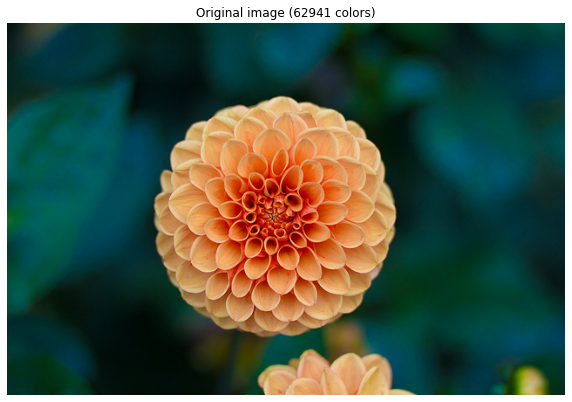

In [20]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.title('Original image (62941 colors)')
plt.imshow(flower)  #original image

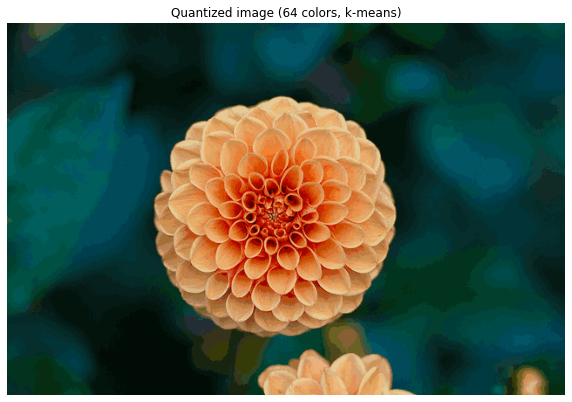

In [21]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, k-means)')
plt.imshow(image_kmeans) #KMeans reduced pixels

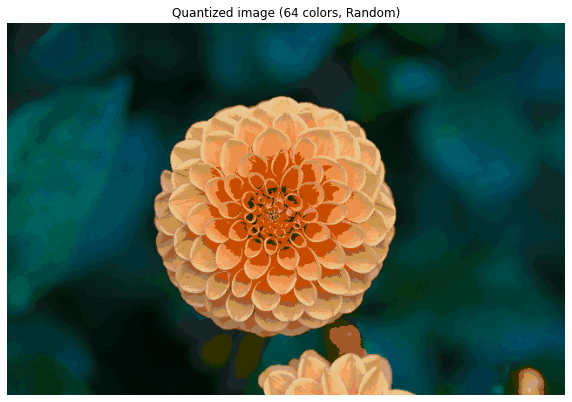

In [22]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random) #random clustering